In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import scipy.signal
import scipy.integrate as spi

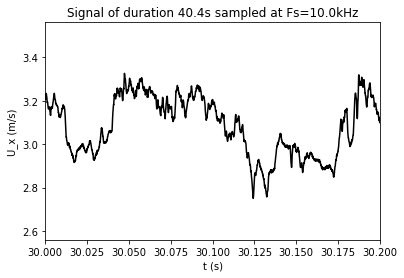

In [16]:
# load signal
file = open('signals_and_functions/signals/signaljet','r')
time, signal = [],[]
for line in file:
    data = line.strip().split('\t') # split on tabs
    time.append(float(data[0]))    # time vector
    signal.append(float(data[1]))  # velocity vector
    
# Sampling frequency
Fs = 10000
Nsamples = len(time)
duration = Nsamples / Fs

# Plot time trace
plt.figure()
plt.plot(time,signal,'k-')
plt.title(f'Signal of duration {duration}s sampled at Fs={Fs/1000}kHz')
plt.xlabel('t (s)')
plt.ylabel('U_x (m/s)')
plt.xlim([0, 40.4])

x0 = 30
dX = 0.2
plt.xlim([x0,x0+dX])

plt.show()

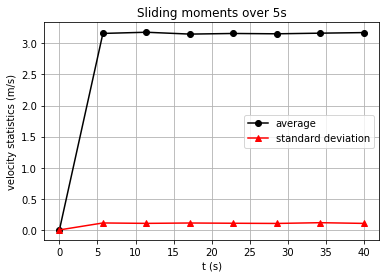

In [26]:
##########################################################################
# First statistical moments estimated over 1s 
###########################################################################
# sliding interval length (s)
Tint = 5
# number of intervals
Nintervals = round(duration/Tint)
# time vector
t1s = np.linspace(0, Nintervals * Tint, Nintervals)

# initialise averages and standard deviations
mean_U = np.zeros(Nintervals)
std_U = np.zeros(Nintervals)
# number of samples per interval
Nsamples_int = int(Tint*Fs)

# loop on intervals
for i in range(1,Nintervals): 
    mean_U[i] = np.mean(signal[(i-1) * Nsamples_int + 1:i * Nsamples_int])
    std_U[i] = np.std(signal[(i-1) * Nsamples_int + 1:i * Nsamples_int])

# plot
plt.figure()
plt.plot(t1s,mean_U,'ko-',label="average")
plt.plot(t1s,std_U,'r^-',label="standard deviation")
plt.xlabel(f't (s)')
plt.ylabel('velocity statistics (m/s)')
plt.title(f"Sliding moments over {Tint}s")
plt.legend(loc='right')
plt.grid()
plt.show()

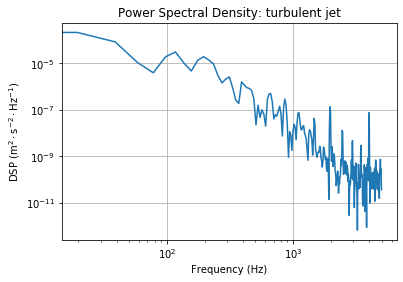

In [48]:
# Question 2: 
# power spectral density using pwelch
###########################################################################
  
# Full signal, no average

Nfft = 2**9
# frequency resolution
df = Fs/Nfft
Nwindow = Nfft
Noverlap = Nfft/2
# Spectrum estimation
F,Pxx = scipy.signal.welch(signal[:Nwindow],Fs,window='hanning',nperseg=Nwindow,noverlap=Noverlap,nfft=Nfft)

# plot
plt.figure()
plt.plot(F,Pxx)
plt.xlabel('Frequency (Hz)')
plt.ylabel('DSP (m$^2\cdot$s$^{-2}\cdot$Hz$^{-1}$)')
plt.grid()
plt.title('Power Spectral Density: turbulent jet')
plt.xscale('log')
plt.yscale('log')
plt.show()


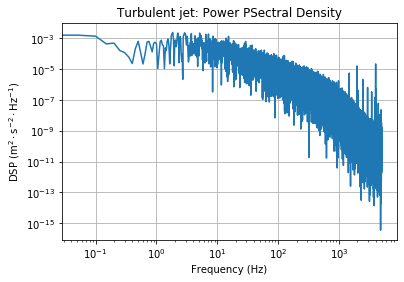

In [68]:
##########################################################################
# Question 3: 
# Periodogram at different frerquency resolutions
###########################################################################
# Frequency resolution XX Hz
df = 0.05
Nfft = int(Fs/df)
Noverlap=Nfft/2
Nwindow = Nfft

# Estimation
F,Pxx = scipy.signal.welch(signal[:Nwindow],Fs,window='hanning',nperseg=Nwindow,noverlap=Noverlap,nfft=Nfft)

# Plot
plt.figure()
plt.plot(F,Pxx, label = f'df={df}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('DSP (m$^2\cdot$s$^{-2}\cdot$Hz$^{-1}$)')
plt.grid()
plt.title('Turbulent jet: Power PSectral Density')
plt.xscale('log')
plt.yscale('log')

plt.show()

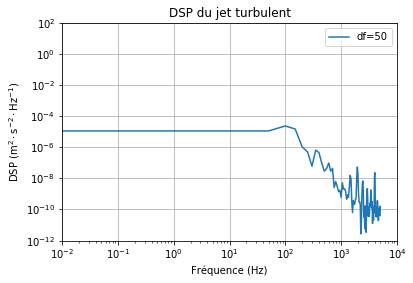

In [72]:
# Frequency resolution XX Hz
df = 50
Nfft = int(Fs/df)
Noverlap=Nfft/2
Nwindow = Nfft

# Estimation
F,Pxx = scipy.signal.welch(signal[:Nwindow],Fs,window='hanning',nperseg=Nwindow,noverlap=Noverlap,nfft=Nfft)
# Plot
plt.plot(F,Pxx, label = f'df={df}')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('DSP (m$^2\cdot$s$^{-2}\cdot$Hz$^{-1}$)')
plt.grid()
plt.title('DSP du jet turbulent')
plt.xscale('log')
plt.yscale('log')
plt.xlim([.01,10000])
plt.ylim([10**(-12),10**2])
plt.legend()

plt.show()

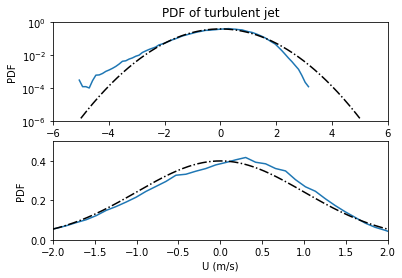

In [65]:
## Probability Density Functions
Sig = (signal-np.mean(signal))/np.std(signal)
NbPt = len(signal)
NbBin = 70

def Gauss(x):
 return 1/(np.sqrt(2*np.pi))*np.exp(-(x**2)/2);

def Calc_PDF(SIG,NbBin):
    """ estimate the probability density function of the signal SIG 
    by integrating the histogram estimated over NbBin intervals
    The same can be done directly by using density option in np.histogram
    """
    # histogram estimation
    PDF, Bin = np.histogram(SIG, NbBin)
    Bin = Bin[:-1] + np.diff(Bin) / 2 # get bin centers
    # normalisize to probability density function
    Int = spi.trapz(PDF, Bin)
    PDF = PDF / Int
    return Bin, PDF

plt.figure()
BG = np.linspace(-5,5,2**20);
Bin,PDF = Calc_PDF(Sig[:NbPt],NbBin);
plt.subplot(2,1,1)
plt.plot(Bin,PDF)
plt.plot(BG,Gauss(BG),'-.k')
plt.xlabel('U (m/s)')
plt.ylabel('PDF')
plt.title('PDF of turbulent jet')
plt.ylim([10**(-6),10**0])
plt.xlim([-6,6])
plt.yscale('log')
plt.subplot(2,1,2)
plt.plot(Bin,PDF)
plt.plot(BG,Gauss(BG),'-.k')
plt.xlabel('U (m/s)')
plt.ylabel('PDF')
plt.ylim([0,0.5])
plt.xlim([-2,2])

plt.show()

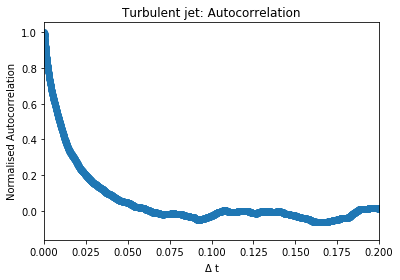

In [66]:
## Plot autocorrelations:
# restrict to save time
test0 = signal[:100000]
test = test0-np.mean(test0)
testnorm = np.sum(test**2)
acor = np.correlate(test,test,mode="same")/testnorm
acor = acor[len(acor)//2:]
plt.figure()
plt.xlabel('$\Delta$ t')
plt.ylabel('Normalised Autocorrelation')
plt.title('Turbulent jet: Autocorrelation')
delta_t=np.linspace(0,len(acor)/Fs,len(acor))
plt.plot(delta_t,acor,'o-')
plt.xlim([-0.00001,.2])
plt.show()